In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [48]:
df = pd.read_csv('Global_Pollution_Analysis.csv')

In [49]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-

In [50]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


In [51]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [52]:
scaler = StandardScaler()
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df[pollution_cols] = scaler.fit_transform(df[pollution_cols])

In [53]:
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

In [54]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          Country         Year  Air_Pollution_Index  Water_Pollution_Index  \
count  200.000000   200.000000         2.000000e+02           2.000000e+02   
mean    88.575000  2009.335000         7.549517e-17          -3.552714e-16   
std     49.924107     5.765325         1.002509e+00           1.002509e+00   
min      0.000000  2000.000000        -1.947928e+00          -1.768540e+00   
25%     45.750000  2004.000000        -6.823730e-01          -8.536990e-01   
50%     90.500000  2010.000000         4.122312e-02          -5.821733e-02   
75%    131.000000  2014.000000         8.489305e-01           8.935479e-01   
max    174.000000  2019.000000         1.753566e+00           1.775151e+00   

       Soil_Pollution_Index  Industrial_Waste (in tons)  \
count          2.000000e+02                   200.00000   
mean           2.486900e-16                 52891.68150   
std            1.002509e+00                 27224.49169   
min           -1.650240e+00         

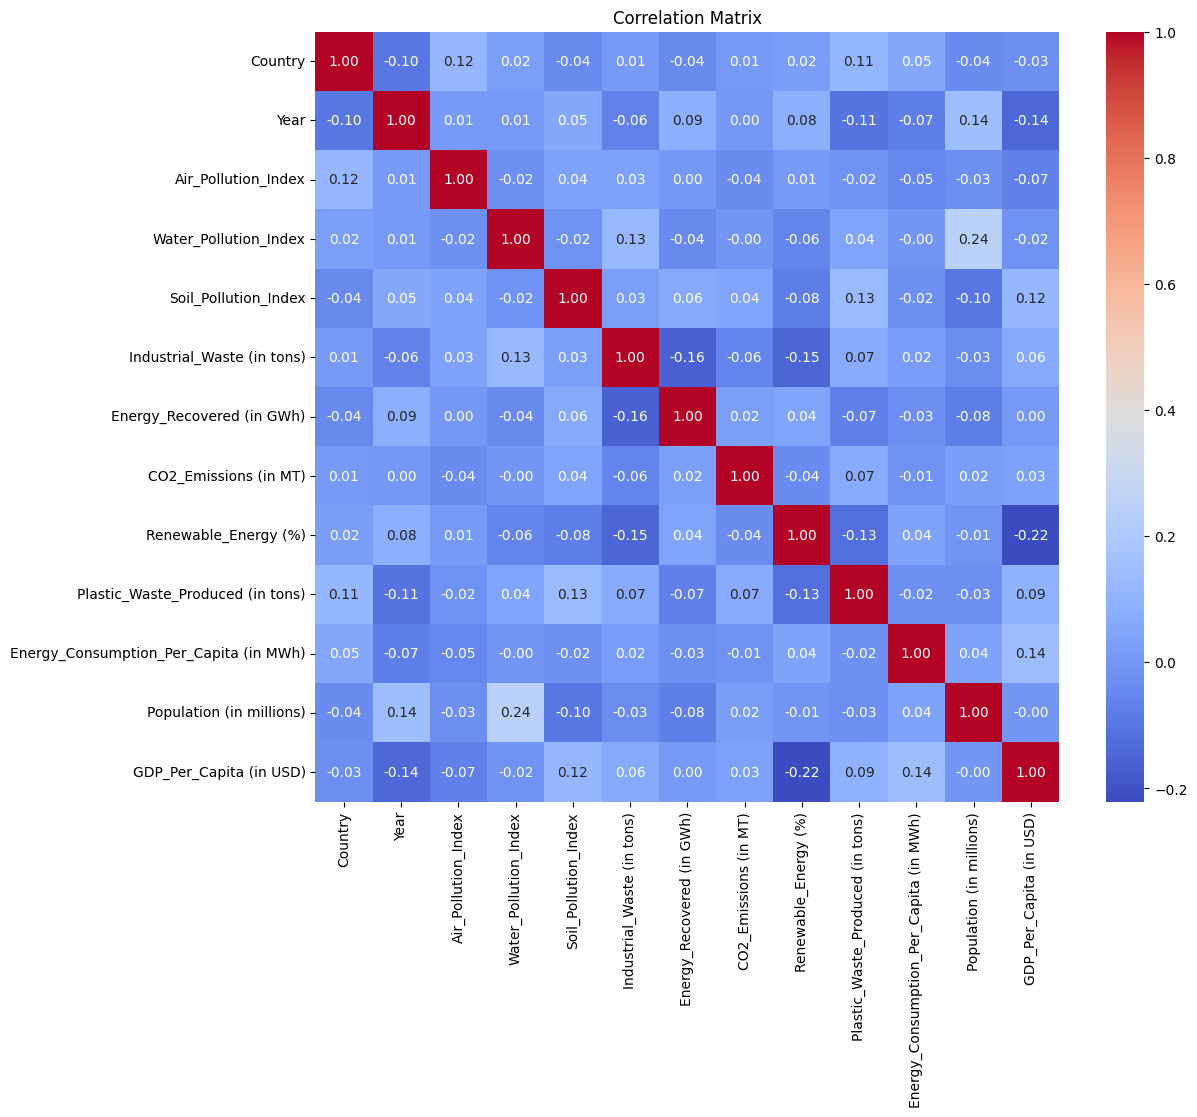

In [55]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

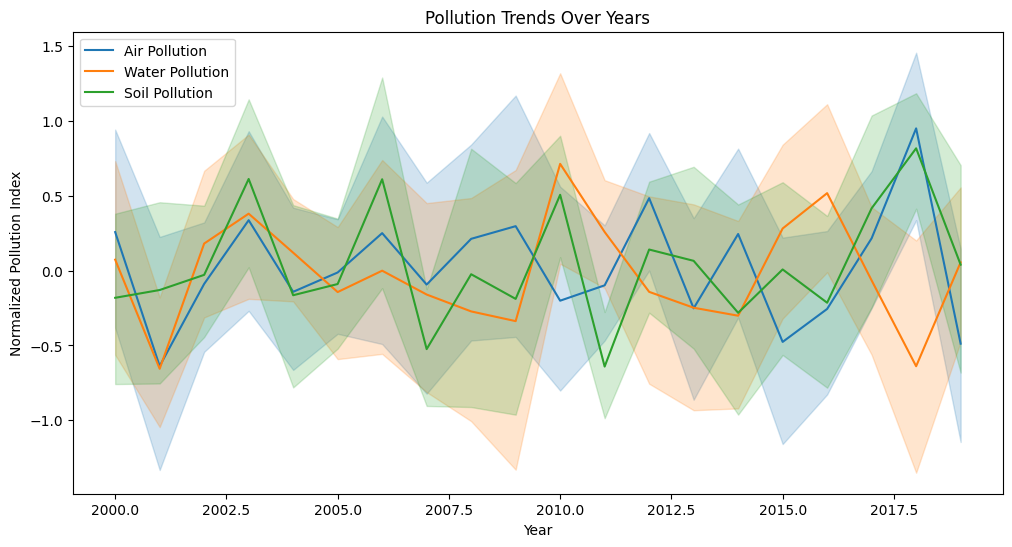

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Air_Pollution_Index', data=df, label='Air Pollution')
sns.lineplot(x='Year', y='Water_Pollution_Index', data=df, label='Water Pollution')
sns.lineplot(x='Year', y='Soil_Pollution_Index', data=df, label='Soil Pollution')
plt.title('Pollution Trends Over Years')
plt.ylabel('Normalized Pollution Index')
plt.legend()
plt.show()

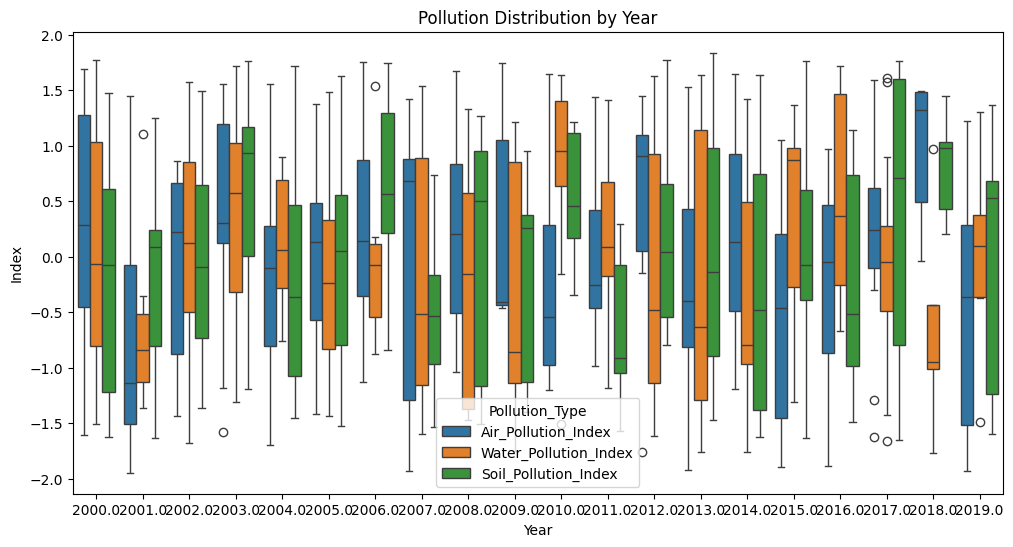

In [57]:
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=['Year'], value_vars=pollution_cols, 
                    var_name='Pollution_Type', value_name='Index')
sns.boxplot(x='Year', y='Index', hue='Pollution_Type', data=df_melted)
plt.title('Pollution Distribution by Year')
plt.show()

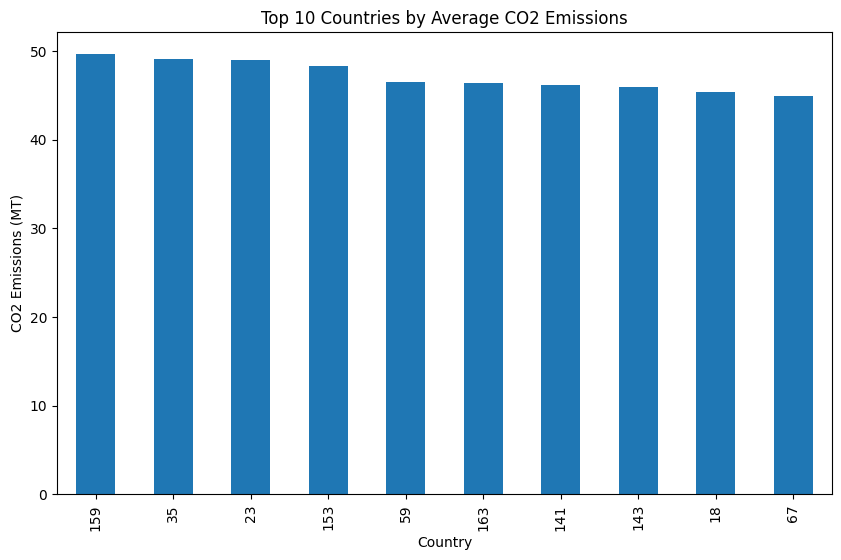

In [59]:
# Corrected code - using the exact column name from the dataset
top_co2 = df.groupby('Country')['CO2_Emissions (in MT)'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
top_co2.plot(kind='bar')
plt.title('Top 10 Countries by Average CO2 Emissions')
plt.ylabel('CO2 Emissions (MT)')
plt.show()


In [60]:
df['Decade'] = (df['Year'] // 10) * 10

In [61]:
df['Total_Pollution_Index'] = df[pollution_cols].sum(axis=1)


In [62]:

df['Waste_to_Energy_Ratio'] = df['Energy_Recovered (in GWh)'] / (df['Industrial_Waste (in tons)'] + 1)

In [63]:
X = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 
        'Industrial_Waste (in tons)', 'CO2_Emissions (in MT)', 'Plastic_Waste_Produced (in tons)']]
y = df['Energy_Recovered (in GWh)']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr_model.predict(X_test)

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nLinear Regression Results:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Linear Regression Results:
R² Score: -0.0479
Mean Squared Error: 25339.75
Mean Absolute Error: 141.51


In [68]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                            Feature  Coefficient
2              Soil_Pollution_Index     7.450228
3        Industrial_Waste (in tons)    -0.000658
5  Plastic_Waste_Produced (in tons)    -0.001168
1             Water_Pollution_Index    -0.253741
4             CO2_Emissions (in MT)    -0.298047
0               Air_Pollution_Index    -8.555013


In [69]:
df['Pollution_Severity'] = pd.qcut(df['Total_Pollution_Index'], q=3, labels=['Low', 'Medium', 'High'])

In [70]:
X_clf = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 
           'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]
y_clf = df['Pollution_Severity']

In [71]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale features
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

# Create and fit model with optimized parameters
logreg = LogisticRegression(solver='lbfgs',
                           max_iter=2000,
                           random_state=42)
logreg.fit(X_train_clf_scaled, y_train_clf)

# Make predictions (remember to scale test data too)
y_pred_clf = logreg.predict(X_test_clf_scaled)

In [75]:
# Scale the test data using the same scaler that was fit on training data
X_test_clf_scaled = scaler.transform(X_test_clf)  # Using the scaler from earlier

# Now predict using scaled data
y_pred_clf = logreg.predict(X_test_clf_scaled)

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test_clf, y_pred_clf)
report = classification_report(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


Logistic Regression Results:
Accuracy: 0.9500

Classification Report:
              precision    recall  f1-score   support

        High       0.83      1.00      0.91        10
         Low       1.00      1.00      1.00        13
      Medium       1.00      0.88      0.94        17

    accuracy                           0.95        40
   macro avg       0.94      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40



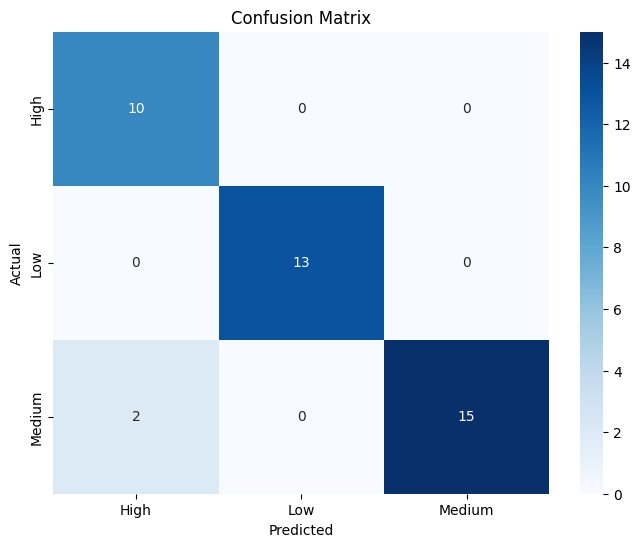

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
print("\nModel Comparison:")
print("Linear Regression for Energy Recovery Prediction:")
print(f"- R² Score: {r2:.4f}")
print(f"- MSE: {mse:.2f}, MAE: {mae:.2f}")

print("\nLogistic Regression for Pollution Severity Classification:")
print(f"- Accuracy: {accuracy:.4f}")
print("- Classification Report:")
print(report)


Model Comparison:
Linear Regression for Energy Recovery Prediction:
- R² Score: -0.0479
- MSE: 25339.75, MAE: 141.51

Logistic Regression for Pollution Severity Classification:
- Accuracy: 0.9500
- Classification Report:
              precision    recall  f1-score   support

        High       0.83      1.00      0.91        10
         Low       1.00      1.00      1.00        13
      Medium       1.00      0.88      0.94        17

    accuracy                           0.95        40
   macro avg       0.94      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40



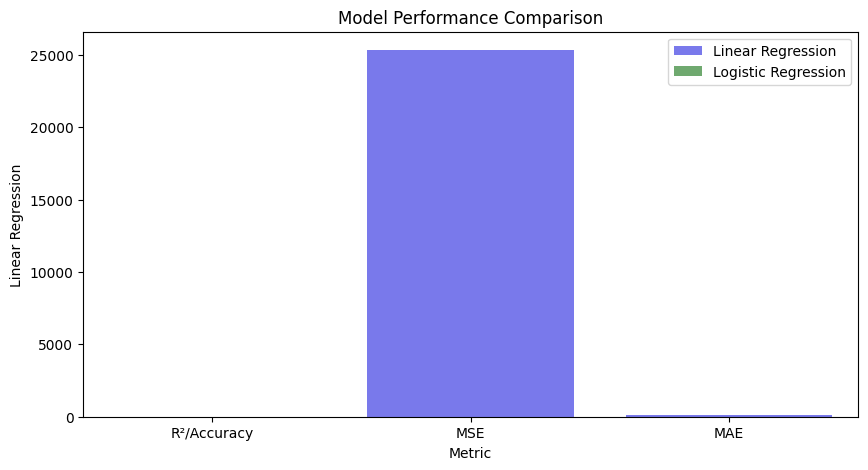

In [79]:
metrics = pd.DataFrame({
    'Metric': ['R²/Accuracy', 'MSE', 'MAE'],
    'Linear Regression': [r2, mse, mae],
    'Logistic Regression': [accuracy, np.nan, np.nan]
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Metric', y='Linear Regression', data=metrics, color='blue', alpha=0.6, label='Linear Regression')
sns.barplot(x='Metric', y='Logistic Regression', data=metrics, color='green', alpha=0.6, label='Logistic Regression')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

In [80]:
df['Energy_Recovery_Efficiency'] = df['Waste_to_Energy_Ratio']
high_pollution_low_recovery = df[(df['Pollution_Severity'] == 'High') & 
                                (df['Energy_Recovery_Efficiency'] < df['Energy_Recovery_Efficiency'].median())]

print("\nCountries with High Pollution but Low Energy Recovery Efficiency:")
print(high_pollution_low_recovery[['Country', 'Total_Pollution_Index', 'Energy_Recovered (in GWh)', 
                                 'Energy_Recovery_Efficiency']].sort_values('Energy_Recovery_Efficiency').head(10))


Countries with High Pollution but Low Energy Recovery Efficiency:
     Country  Total_Pollution_Index  Energy_Recovered (in GWh)  \
175      111               2.884243                      15.98   
173       79               2.043629                      11.73   
136       35               3.081554                      22.21   
193      139               1.130439                      36.98   
47        36               1.249226                      24.45   
4         46               1.378747                      40.38   
116      111               1.609406                     103.03   
44        90               2.211315                     100.23   
73       104               1.916541                     100.15   
58       160               1.900113                      74.46   

     Energy_Recovery_Efficiency  
175                    0.000175  
173                    0.000177  
136                    0.000240  
193                    0.000401  
47                     0.000474  
4 

In [81]:
print("\nKey Recommendations:")
print("1. Countries with high pollution indices but low energy recovery should invest in waste-to-energy technologies.")
print("2. Focus on reducing CO2 emissions and industrial waste, which show strong negative correlations with energy recovery.")
print("3. Implement policies to improve energy recovery efficiency, especially in countries with high pollution severity.")
print("4. Promote renewable energy sources to reduce dependence on fossil fuels and lower pollution levels.")


Key Recommendations:
1. Countries with high pollution indices but low energy recovery should invest in waste-to-energy technologies.
2. Focus on reducing CO2 emissions and industrial waste, which show strong negative correlations with energy recovery.
3. Implement policies to improve energy recovery efficiency, especially in countries with high pollution severity.
4. Promote renewable energy sources to reduce dependence on fossil fuels and lower pollution levels.
